In [1]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [3]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [4]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\2170991390.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.drop_duplicates(subset=['images']).groupby('interval').size().reset_index(name='unique_images')
C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\2170991390.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_books_per_interval = books.drop_duplicates(subset=['book']).groupby('interval').size().reset_index(name='unique_books')


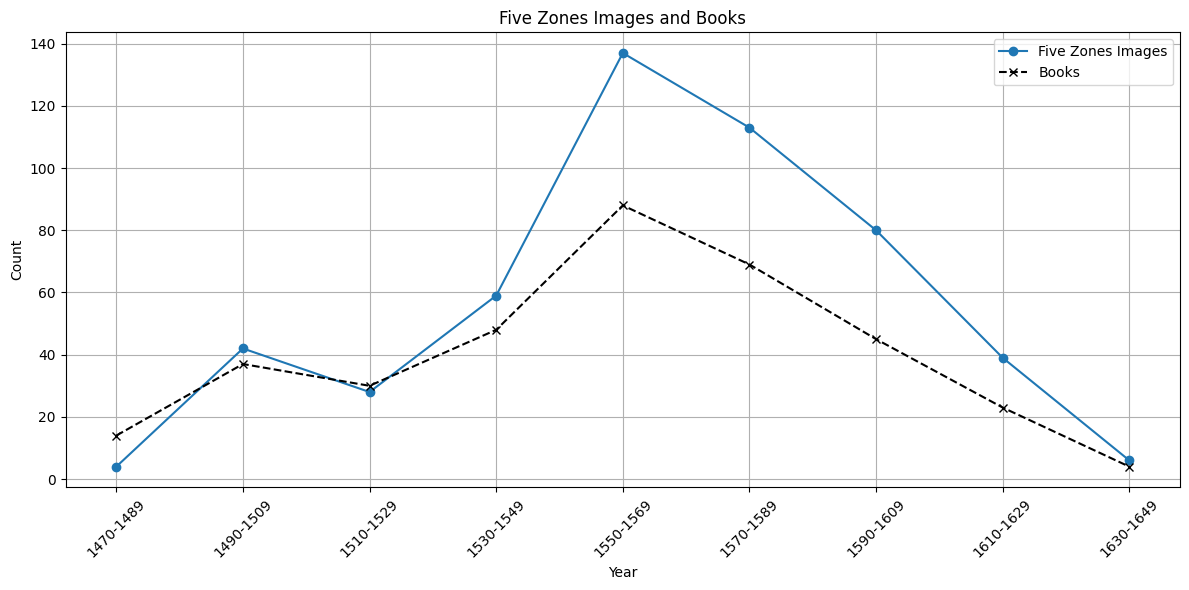

In [5]:
# Assuming df and books are already defined as DataFrames
# Ensure the year column is of integer type
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = ['CK_Five Zones']

# Create a boolean mask for the keywords
mask = df['cks'].apply(lambda x: any(keyword in x for keyword in keywords))

# Filter the DataFrame based on the mask
filtered_df = df[mask]

# Count unique images per interval using drop_duplicates and size
unique_images_per_interval = filtered_df.drop_duplicates(subset=['images']).groupby('interval').size().reset_index(name='unique_images')

# Count unique books per interval using drop_duplicates and size
unique_books_per_interval = books.drop_duplicates(subset=['book']).groupby('interval').size().reset_index(name='unique_books')

# Merge the two DataFrames on 'interval'
merged_df = pd.merge(unique_images_per_interval, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(merged_df['interval'], merged_df['unique_images'], label='Five Zones Images', marker='o')
plt.plot(merged_df['interval'], merged_df['unique_books'], label='Books', color='black', linestyle='--', marker='x')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Five Zones Images and Books')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# creating a df for five zones images content keyword

keywords = [
    'CK_five Zones'
]

# Combine keywords into a single pattern string
pattern = '|'.join([fr'\b{keyword}\b' for keyword in keywords])

# Filter the DataFrame
five_zones = df[df['cks'].str.contains(pattern, case=False, na=False)]

five_zones = five_zones[['images', 'cluster_name', 'cks', 'bid', 'custom_identifier', 'year', 'place']]
five_zones.rename(columns={'custom_identifier': 'part_id'}, inplace=True)


In [7]:
#unique_values = five_zones['cluster_name'].unique()
#unique_df = pd.DataFrame(unique_values, columns=['cluster_name']) 
#unique_df.to_excel('five_zones.xlsx', index=False, sheet_name='Sheet1')

In [8]:
#five zones images with visual tagging

# Path to the Excel file
excel_file_path = 'C:\\Users\\nogas\\Image_data\\five_zones.xlsx'

# Load the Excel file into a DataFrame
excel_data = pd.read_excel(excel_file_path)

five_zones_full = pd.merge(five_zones, excel_data, on='cluster_name', how='left')

five_zones_full

,images,cluster_name,cks,bid,part_id,year,place,decoration of earth and water,full terraqueous globe,3D decoration,...,type b,type c,type other,seven climes,3D,multiple outer circles,eliptic not round,double lines for materiality effect,human figures,diagram
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01864,CK_Five Zones,2200,100,1489,Leipzig,no,no,no,...,no,no,no,no,no,no,no,no,no,no
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01001,"CK_Five Zones, CK_Seven Climate Zones, CK_Terr...",1844,229,1495,Leipzig,yes,no,no,...,no,no,no,yes,no,yes,no,no,no,no
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00625,"CK_Five Zones, CK_Terraqueous Globe",1844,229,1495,Leipzig,yes,no,no,...,no,no,no,no,no,no,no,no,no,no
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01864,CK_Five Zones,2201,100,1489,Leipzig,no,no,no,...,no,no,no,no,no,no,no,no,no,no
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01864,CK_Five Zones,1616,100,1486,Leipzig,no,no,no,...,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_03704,CK_Five Zones,2234,812,1564,Antwerp,no,no,no,...,no,no,yes,no,no,no,no,yes,no,no
509,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_03704,CK_Five Zones,2235,812,1568,Antwerp,no,no,no,...,no,no,yes,no,no,no,no,yes,no,no
510,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_03704,CK_Five Zones,2231,812,1573,Antwerp,no,no,no,...,no,no,yes,no,no,no,no,yes,no,no
511,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_03704,CK_Five Zones,2208,812,1575,Antwerp,no,no,no,...,no,no,yes,no,no,no,no,yes,no,no


C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\2668546664.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\2668546664.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\2668546664.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

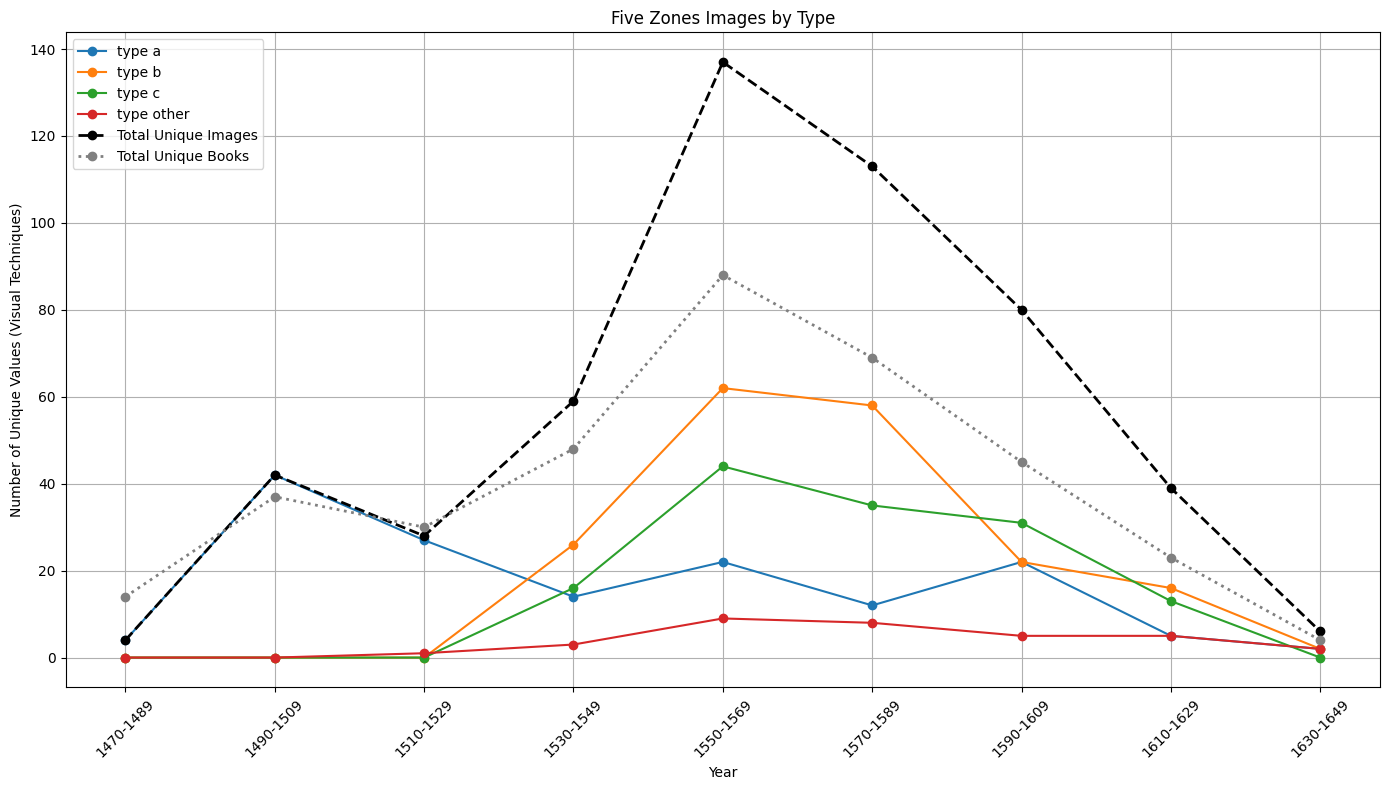

In [9]:
# Convert 'year' to int
five_zones_full['year'] = five_zones_full['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
five_zones_full['interval'] = pd.cut(five_zones_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name):
    filtered_df = five_zones_full[five_zones_full[column_name] == 'yes']
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
columns_to_plot = [
    'type a',
    'type b',
    'type c',
    'type other'
]

# Create a DataFrame to hold counts for each column
side_by_side_data = pd.DataFrame()

for column in columns_to_plot:
    side_by_side_data[column] = count_unique_images_by_column(column)

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = five_zones_full.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines for unique images and books
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot total unique images
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)

# Plot total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values (Visual Techniques)')
ax.set_title('Five Zones Images by Type')
ax.tick_params(axis='y')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\2295137194.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\2295137194.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\2295137194.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

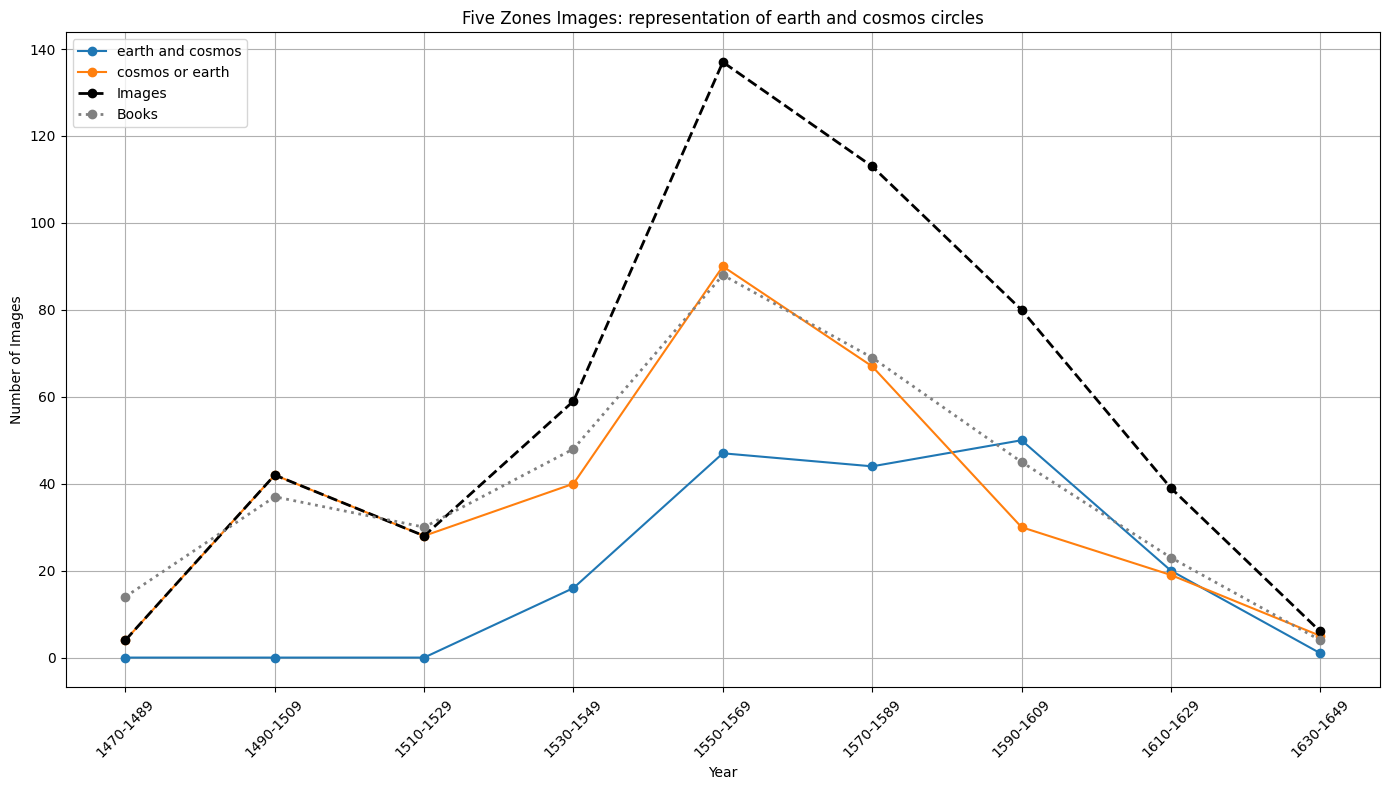

In [10]:
# Convert 'year' to int
five_zones_full['year'] = five_zones_full['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
five_zones_full['interval'] = pd.cut(five_zones_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name):
    filtered_df = five_zones_full[five_zones_full[column_name] == 'yes']
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
columns_to_plot = [
    'earth and cosmos',
    'cosmos or earth'
]

# Create a DataFrame to hold counts for each column
side_by_side_data = pd.DataFrame()

for column in columns_to_plot:
    side_by_side_data[column] = count_unique_images_by_column(column)

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = five_zones_full.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines for unique images and books
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot total unique images
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Images', linewidth=2)

# Plot total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Images')
ax.set_title('Five Zones Images: representation of earth and cosmos circles')
ax.tick_params(axis='y')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\45538716.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\45538716.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\45538716.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

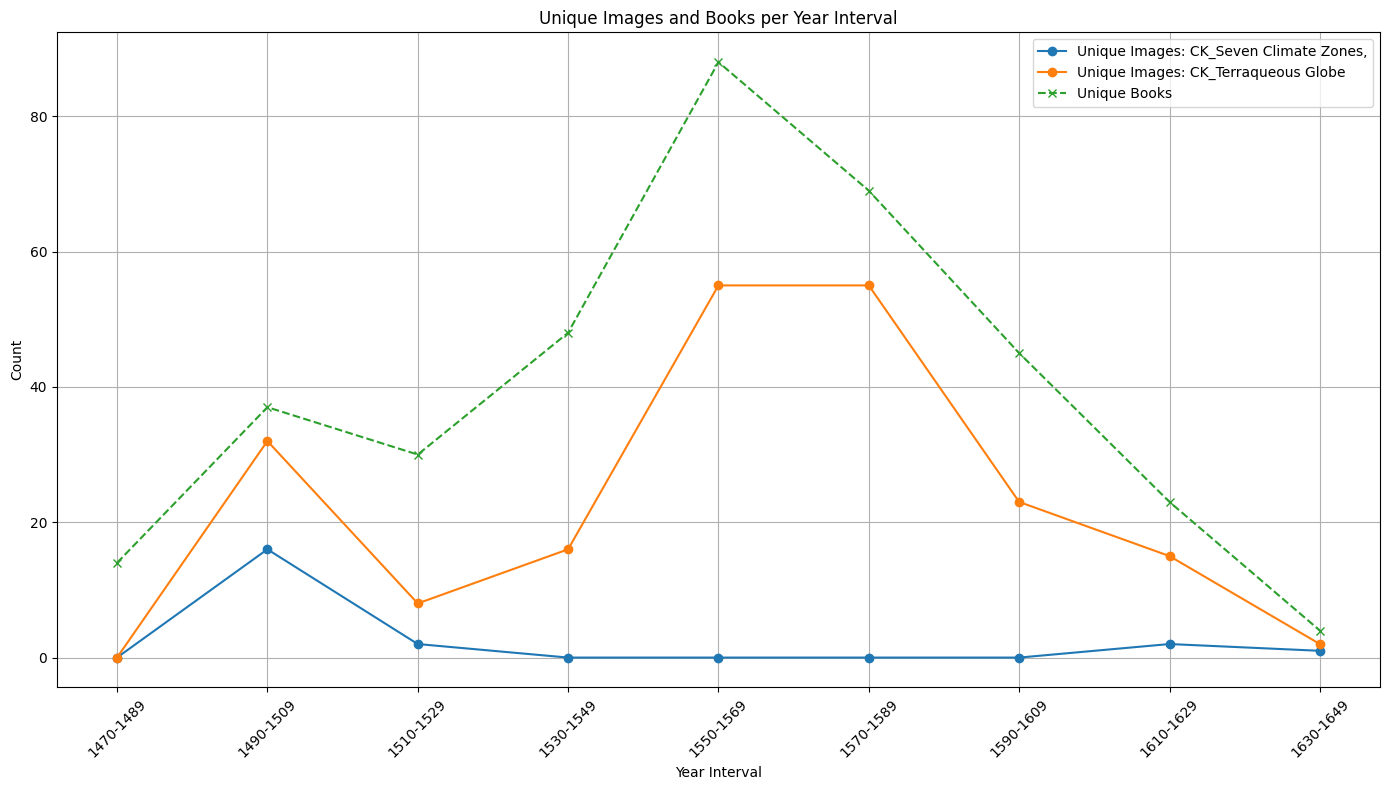

In [11]:
five_zones_full['year'] = five_zones_full['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
five_zones_full['interval'] = pd.cut(five_zones_full['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = [
    'CK_Seven Climate Zones,', 'CK_Terraqueous Globe'
]

# Prepare a DataFrame for each keyword
keyword_dfs = {}
for keyword in keywords:
    # Create a boolean mask for the keyword
    mask = five_zones_full['cks'].apply(lambda x: keyword in x)
    
    # Filter the DataFrame based on the mask
    filtered_df = five_zones_full[mask]
    
    # Count unique images per interval for this keyword
    unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
    unique_images_per_interval.columns = ['interval', f'unique_images_{keyword}']
    
    keyword_dfs[keyword] = unique_images_per_interval

# Merge all keyword DataFrames on 'interval'
merged_keyword_df = pd.merge(keyword_dfs[keywords[0]], keyword_dfs[keywords[1]], on='interval', how='outer')
for keyword in keywords[2:]:
    merged_keyword_df = pd.merge(merged_keyword_df, keyword_dfs[keyword], on='interval', how='outer')

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the keyword DataFrame with the books DataFrame
final_df = pd.merge(merged_keyword_df, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(14, 8))

# Plot each keyword
for keyword in keywords:
    plt.plot(final_df['interval'], final_df[f'unique_images_{keyword}'], label=f'Unique Images: {keyword}', marker='o')

# Plot unique books
plt.plot(final_df['interval'], final_df['unique_books'], label='Unique Books', marker='x', linestyle='--')

plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.title('Unique Images and Books per Year Interval')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\2897282522.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\2897282522.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\2897282522.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observe

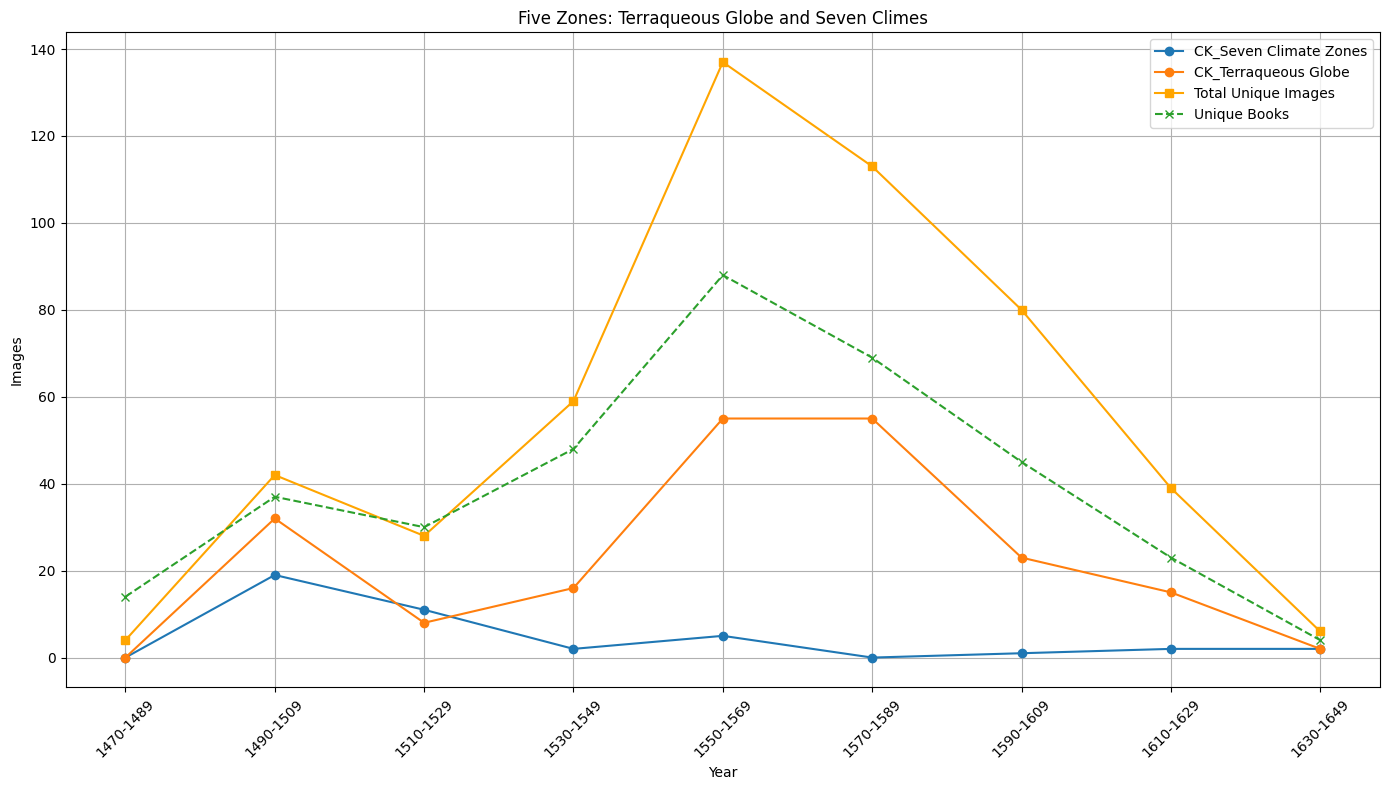

In [12]:

# Ensure 'year' columns are integers
five_zones_full['year'] = five_zones_full['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
five_zones_full['interval'] = pd.cut(five_zones_full['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = [
    'CK_Seven Climate Zones', 'CK_Terraqueous Globe'
]

# Prepare a DataFrame for each keyword
keyword_dfs = {}
for keyword in keywords:
    # Create a boolean mask for the keyword
    mask = five_zones_full['cks'].apply(lambda x: keyword in x)
    
    # Filter the DataFrame based on the mask
    filtered_df = five_zones_full[mask]
    
    # Count unique images per interval for this keyword
    unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
    unique_images_per_interval.columns = ['interval', f'unique_images_{keyword}']
    
    keyword_dfs[keyword] = unique_images_per_interval

# Merge all keyword DataFrames on 'interval'
merged_keyword_df = pd.merge(keyword_dfs[keywords[0]], keyword_dfs[keywords[1]], on='interval', how='outer')

# Count unique images across all data
total_unique_images_per_interval = five_zones_full.groupby('interval')['images'].nunique().reset_index()
total_unique_images_per_interval.columns = ['interval', 'total_unique_images']

# Merge total unique images with the keyword DataFrames
final_df = pd.merge(merged_keyword_df, total_unique_images_per_interval, on='interval', how='outer')

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the keyword DataFrame with the books DataFrame
final_df = pd.merge(final_df, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(14, 8))

# Plot each keyword
for keyword in keywords:
    plt.plot(final_df['interval'], final_df[f'unique_images_{keyword}'], label=keyword, marker='o')

# Plot total unique images
plt.plot(final_df['interval'], final_df['total_unique_images'], label='Total Unique Images', color='orange', linestyle='-', marker='s')

# Plot unique books
plt.plot(final_df['interval'], final_df['unique_books'], label='Unique Books', marker='x', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Images')
plt.title('Five Zones: Terraqueous Globe and Seven Climes')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\729778961.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\729778961.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\729778961.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

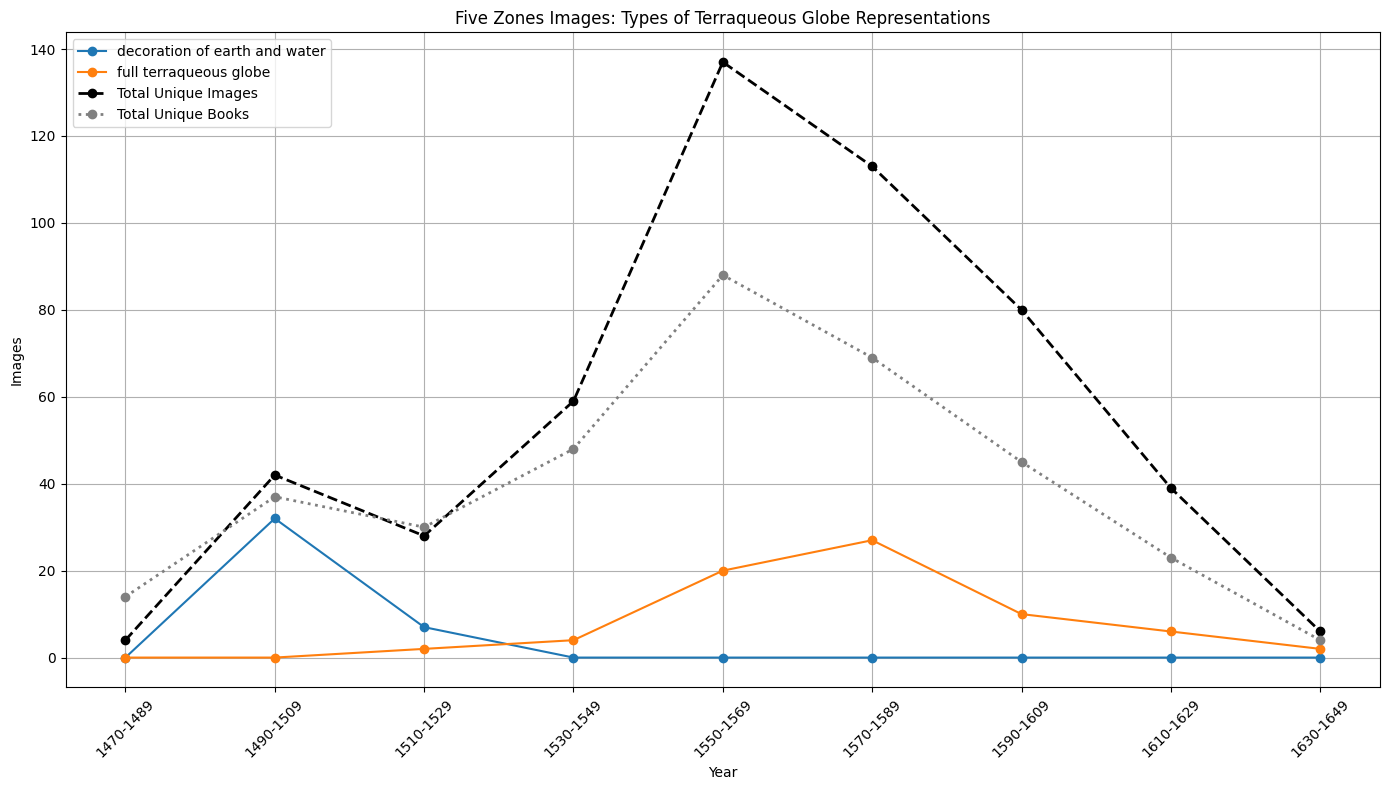

In [13]:
# Convert 'year' to int
five_zones_full['year'] = five_zones_full['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
five_zones_full['interval'] = pd.cut(five_zones_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name):
    filtered_df = five_zones_full[five_zones_full[column_name] == 'yes']
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
columns_to_plot = [
  'decoration of earth and water',
    'full terraqueous globe',
]

# Create a DataFrame to hold counts for each column
side_by_side_data = pd.DataFrame()

for column in columns_to_plot:
    side_by_side_data[column] = count_unique_images_by_column(column)

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = five_zones_full.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines for unique images and books
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot total unique images
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)

# Plot total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Images')
ax.set_title('Five Zones Images: Types of Terraqueous Globe Representations')
ax.tick_params(axis='y')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\2138245183.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\2138245183.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_14044\2138245183.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

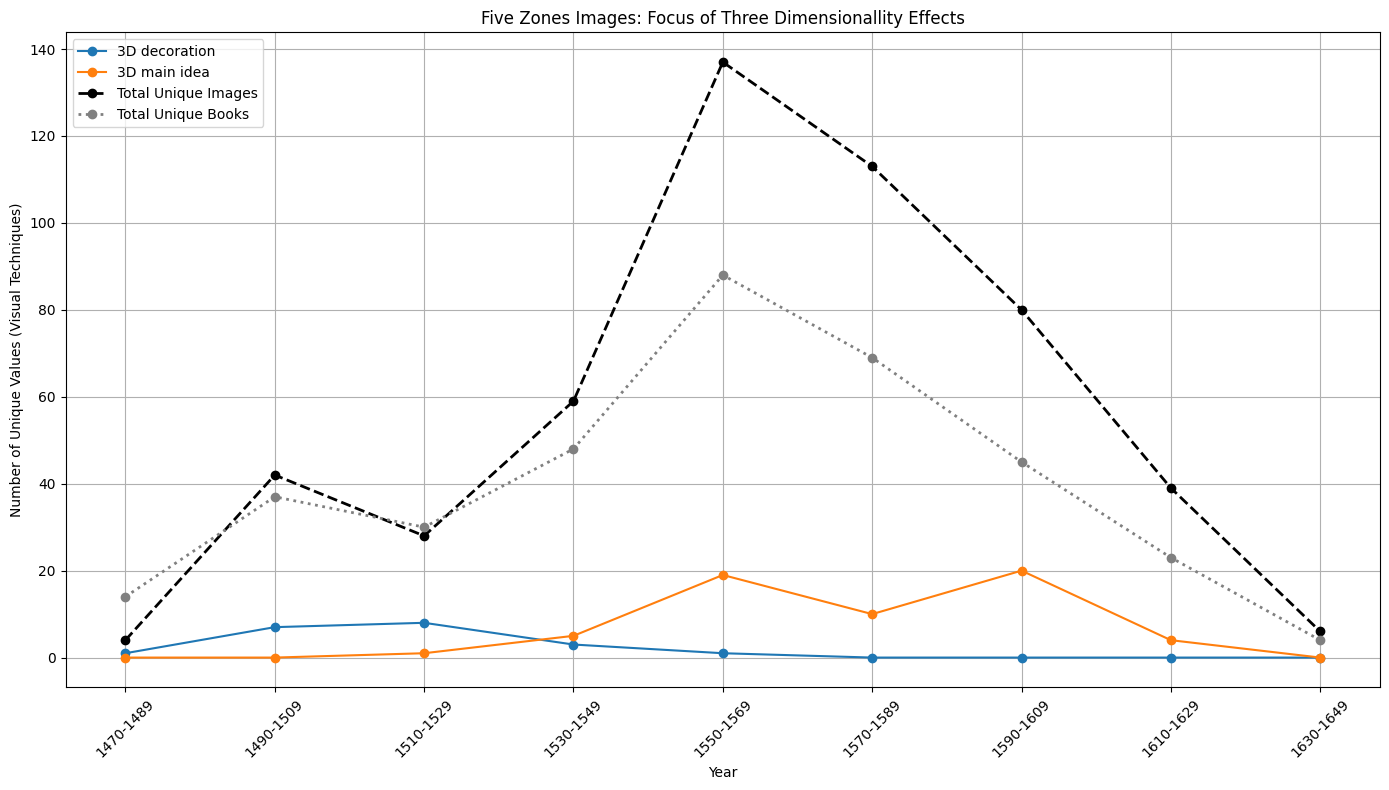

In [15]:
# Convert 'year' to int
five_zones_full['year'] = five_zones_full['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
five_zones_full['interval'] = pd.cut(five_zones_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name):
    filtered_df = five_zones_full[five_zones_full[column_name] == 'yes']
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
columns_to_plot = [
    '3D decoration',
    '3D main idea'
]

# Create a DataFrame to hold counts for each column
side_by_side_data = pd.DataFrame()

for column in columns_to_plot:
    side_by_side_data[column] = count_unique_images_by_column(column)

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = five_zones_full.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines for unique images and books
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot total unique images
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)

# Plot total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values (Visual Techniques)')
ax.set_title('Five Zones Images: Focus of Three Dimensionallity Effects')
ax.tick_params(axis='y')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\3359032071.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\3359032071.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\3359032071.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

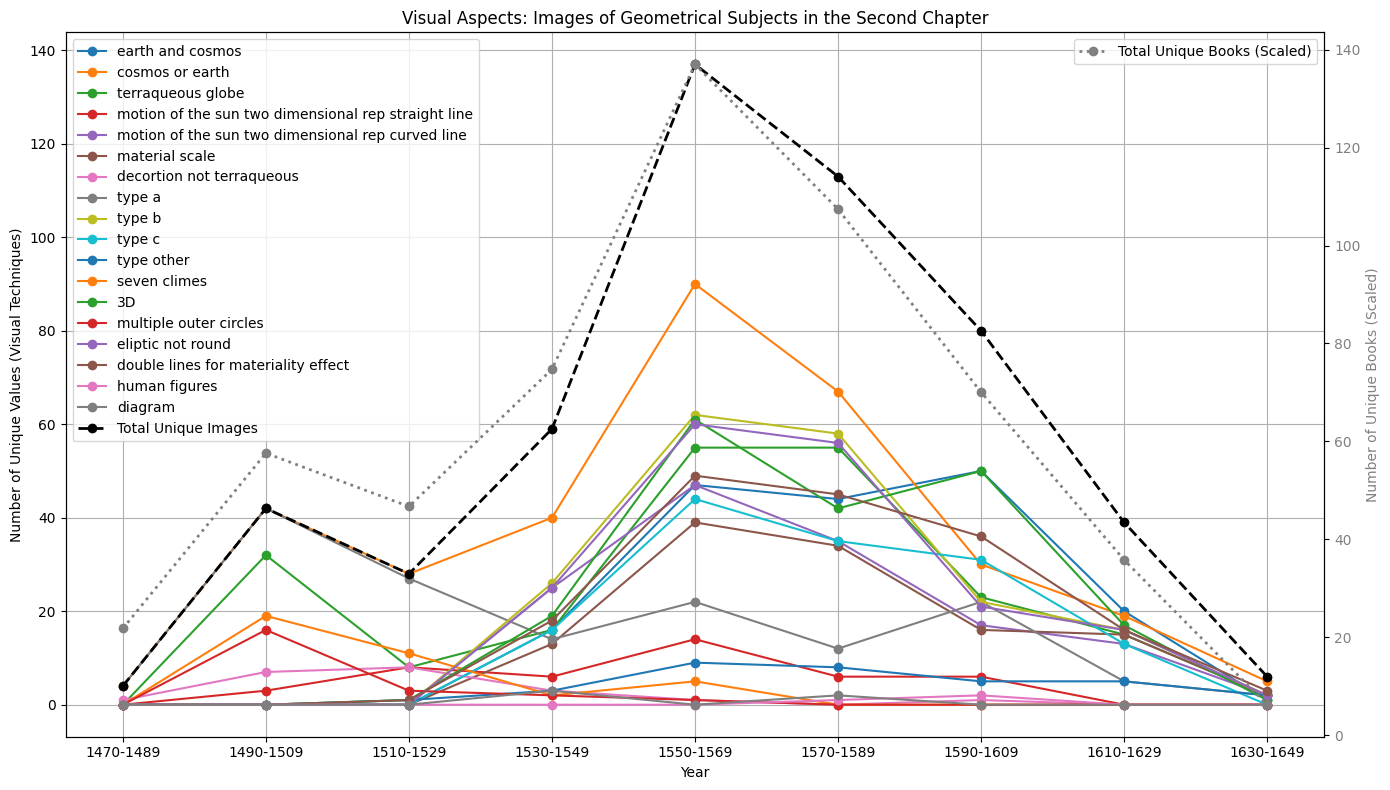

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'year' to int
five_zones_full['year'] = five_zones_full['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
five_zones_full['interval'] = pd.cut(five_zones_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name):
    filtered_df = five_zones_full[five_zones_full[column_name] == 'yes']
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
columns_to_plot = [
    'earth and cosmos',
    'cosmos or earth',
    'terraqueous globe',
    'motion of the sun two dimensional rep straight line',
    'motion of the sun two dimensional rep curved line',
    'material scale',
    'decortion not terraqueous',
    'type a',
    'type b',
    'type c',
    'type other',
    'seven climes',
    '3D',
    'multiple outer circles',
    'eliptic not round',
    'double lines for materiality effect',
    'human figures',
    'diagram'
]

# Create a DataFrame to hold counts for each column
side_by_side_data = pd.DataFrame()

for column in columns_to_plot:
    side_by_side_data[column] = count_unique_images_by_column(column)

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = five_zones_full.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Determine a scaling factor for the secondary y-axis
scaling_factor = total_unique_images.max() / total_unique_books_df.max()

# Scale the book values for the secondary y-axis
scaled_books_df = total_unique_books_df * scaling_factor

# Plot lines with secondary y-axis for total unique books
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax1.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot lines for total unique images and total unique books
ax1.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax2.plot(labels, scaled_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books (Scaled)', linewidth=2)

# Formatting the plot
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Unique Values (Visual Techniques)')
ax2.set_ylabel('Number of Unique Books (Scaled)', color='gray')
ax1.set_title('Visual Aspects: Images of Geometrical Subjects in the Second Chapter')
ax1.tick_params(axis='y')
ax2.tick_params(axis='y', labelcolor='gray')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\3901484558.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\3901484558.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\3901484558.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

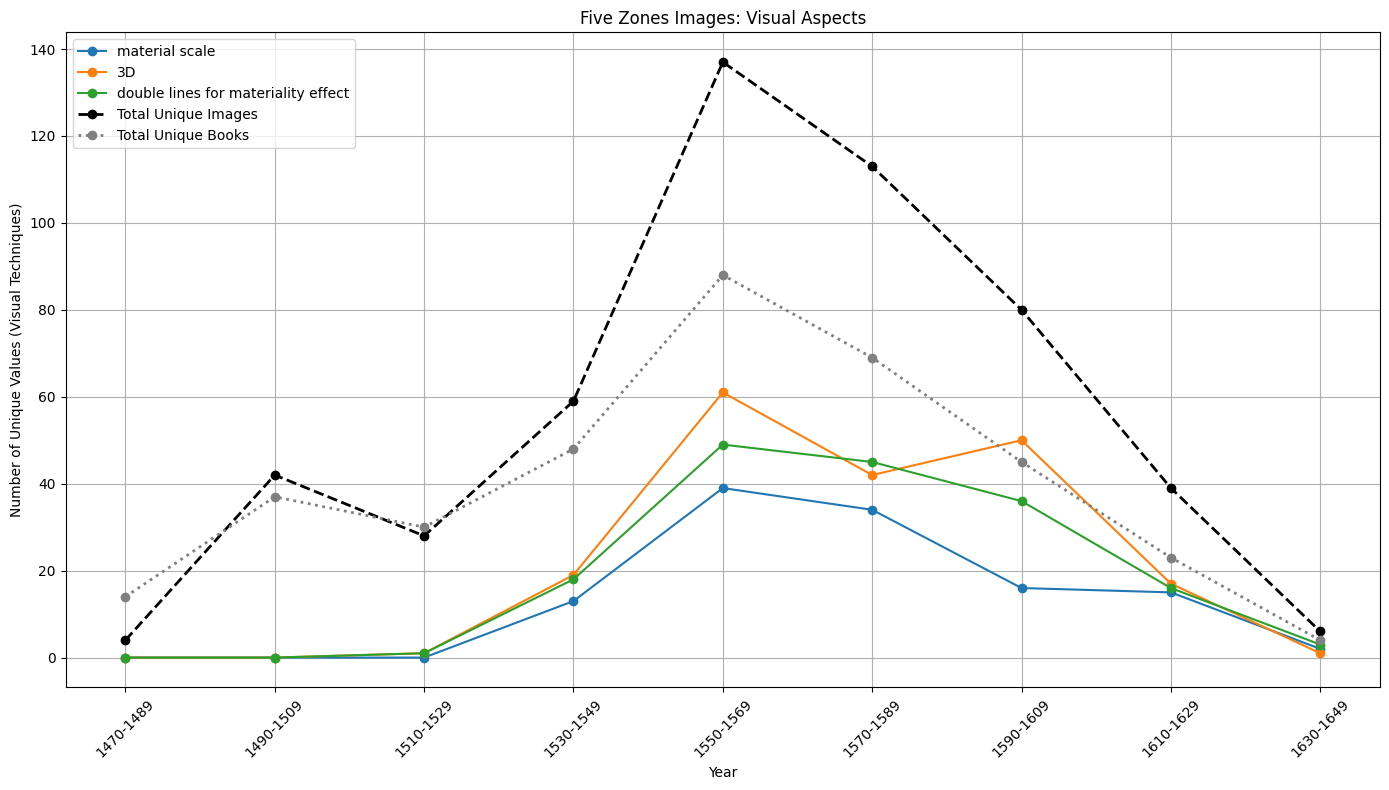

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'year' to int
five_zones_full['year'] = five_zones_full['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
five_zones_full['interval'] = pd.cut(five_zones_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name):
    filtered_df = five_zones_full[five_zones_full[column_name] == 'yes']
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
columns_to_plot = [
    'material scale',
    '3D',
    'double lines for materiality effect'
]

# Create a DataFrame to hold counts for each column
side_by_side_data = pd.DataFrame()

for column in columns_to_plot:
    side_by_side_data[column] = count_unique_images_by_column(column)

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = five_zones_full.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines for unique images and books
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot total unique images
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)

# Plot total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values (Visual Techniques)')
ax.set_title('Five Zones Images: Visual Aspects')
ax.tick_params(axis='y')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\517261160.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\517261160.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\517261160.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

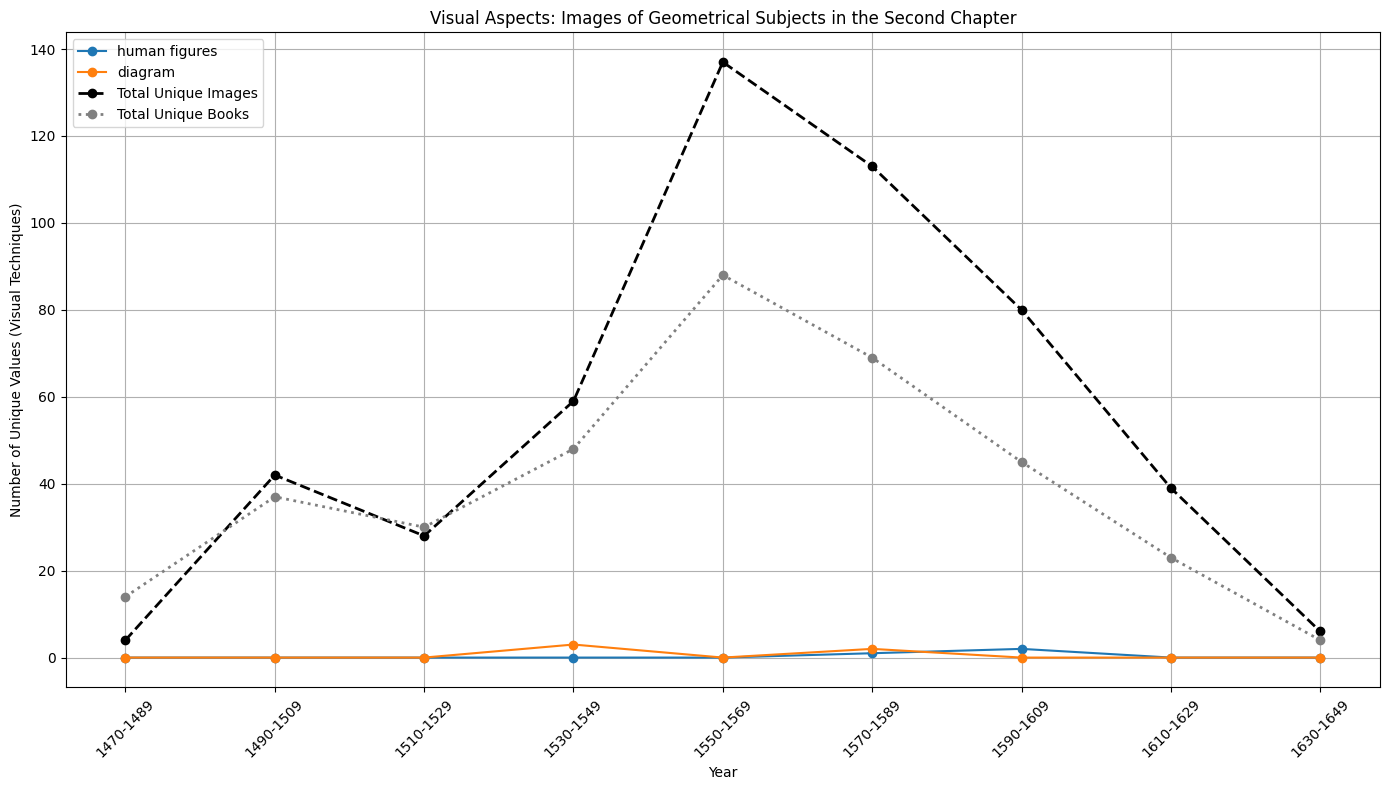

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'year' to int
five_zones_full['year'] = five_zones_full['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
five_zones_full['interval'] = pd.cut(five_zones_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name):
    filtered_df = five_zones_full[five_zones_full[column_name] == 'yes']
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
columns_to_plot = [
    'human figures',
    'diagram'
]

# Create a DataFrame to hold counts for each column
side_by_side_data = pd.DataFrame()

for column in columns_to_plot:
    side_by_side_data[column] = count_unique_images_by_column(column)

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = five_zones_full.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines for unique images and books
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot total unique images
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)

# Plot total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values (Visual Techniques)')
ax.set_title('Visual Aspects: Images of Geometrical Subjects in the Second Chapter')
ax.tick_params(axis='y')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\903569093.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\903569093.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\903569093.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

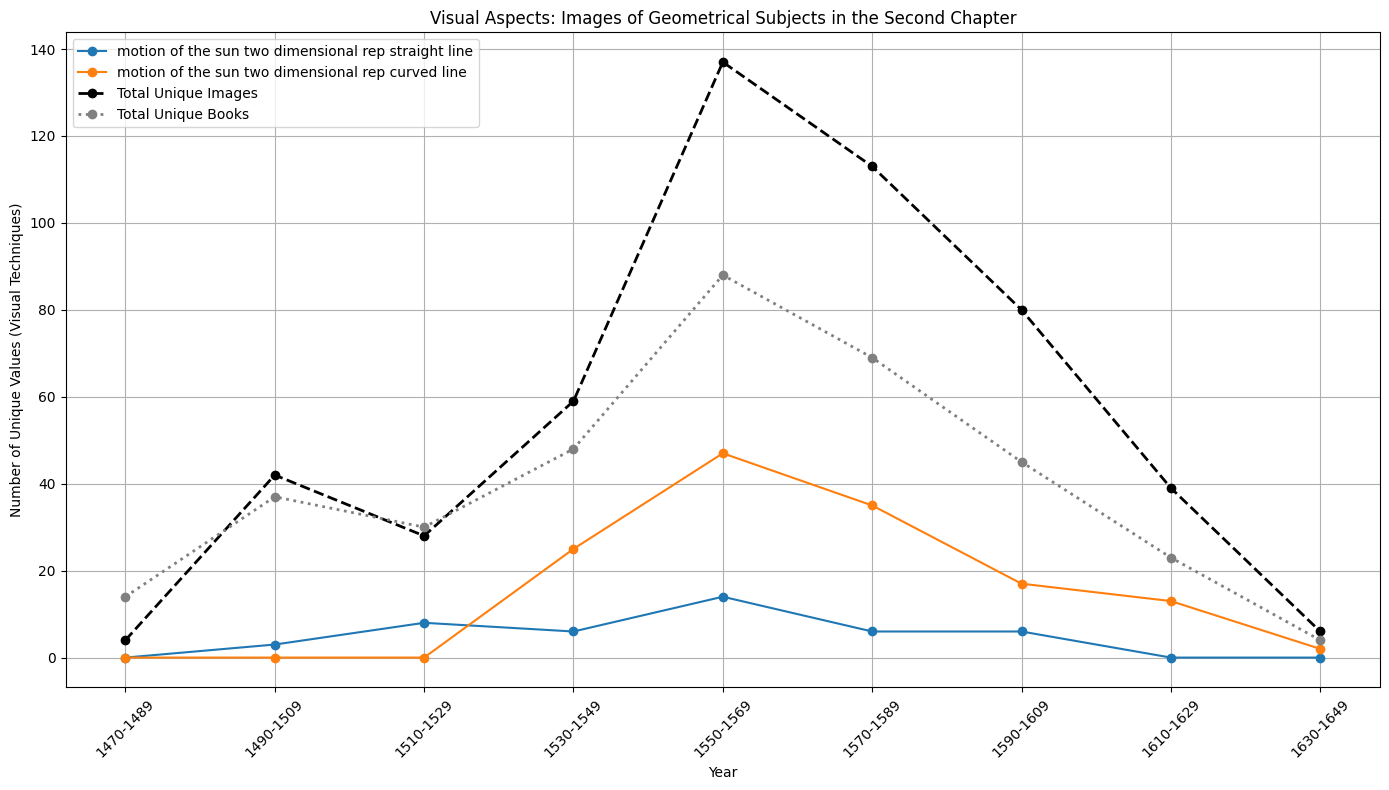

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'year' to int
five_zones_full['year'] = five_zones_full['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
five_zones_full['interval'] = pd.cut(five_zones_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name):
    filtered_df = five_zones_full[five_zones_full[column_name] == 'yes']
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
columns_to_plot = [
    'motion of the sun two dimensional rep straight line',
    'motion of the sun two dimensional rep curved line',
]

# Create a DataFrame to hold counts for each column
side_by_side_data = pd.DataFrame()

for column in columns_to_plot:
    side_by_side_data[column] = count_unique_images_by_column(column)

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = five_zones_full.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines for unique images and books
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot total unique images
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)

# Plot total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values (Visual Techniques)')
ax.set_title('Visual Aspects: Images of Geometrical Subjects in the Second Chapter')
ax.tick_params(axis='y')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\1829405427.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\1829405427.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\1829405427.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

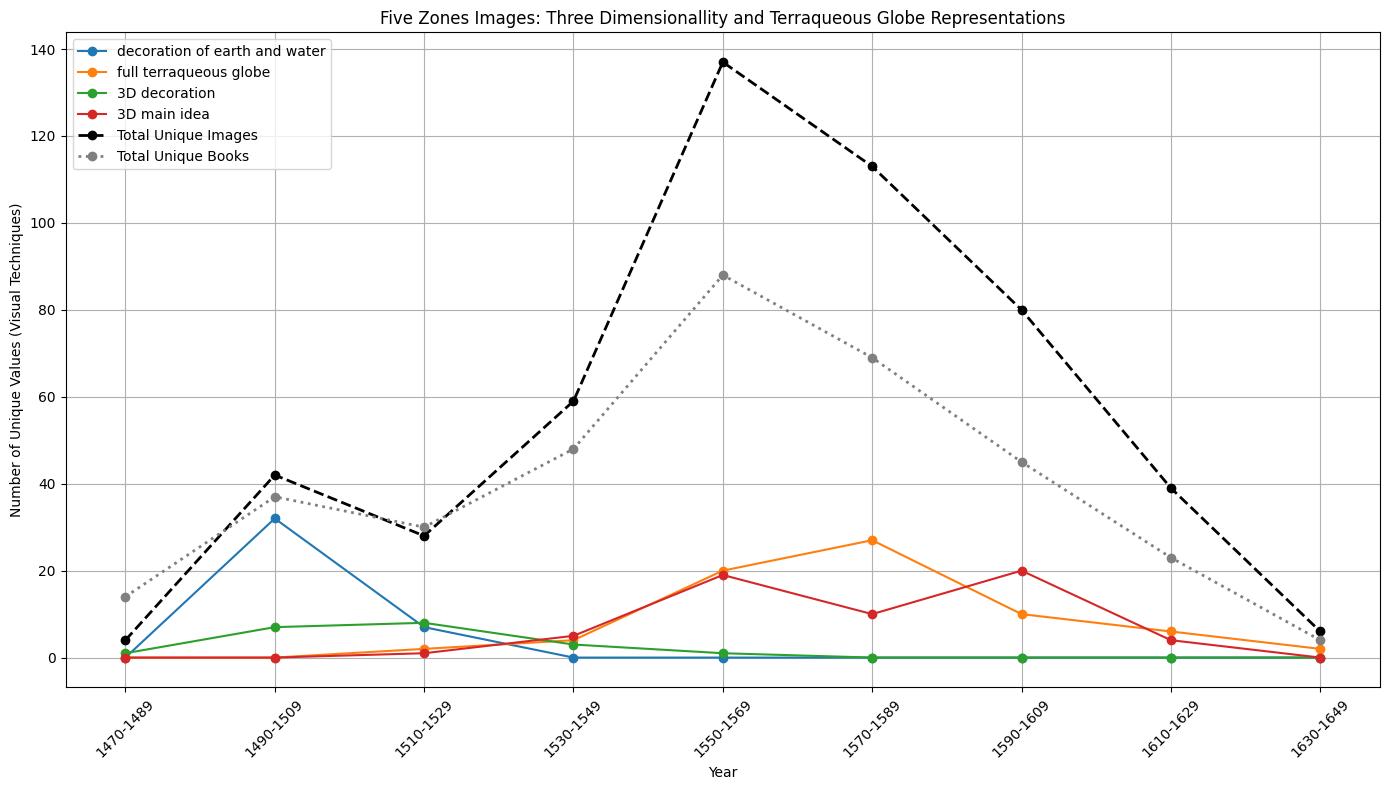

In [37]:
# Convert 'year' to int
five_zones_full['year'] = five_zones_full['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
five_zones_full['interval'] = pd.cut(five_zones_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name):
    filtered_df = five_zones_full[five_zones_full[column_name] == 'yes']
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
columns_to_plot = [
  'decoration of earth and water',
    'full terraqueous globe',
    '3D decoration',
    '3D main idea'
]

# Create a DataFrame to hold counts for each column
side_by_side_data = pd.DataFrame()

for column in columns_to_plot:
    side_by_side_data[column] = count_unique_images_by_column(column)

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = five_zones_full.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines for unique images and books
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot total unique images
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)

# Plot total unique books
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values (Visual Techniques)')
ax.set_title('Five Zones Images: Three Dimensionallity and Terraqueous Globe Representations')
ax.tick_params(axis='y')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\3578742882.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\3578742882.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_16368\3578742882.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=F

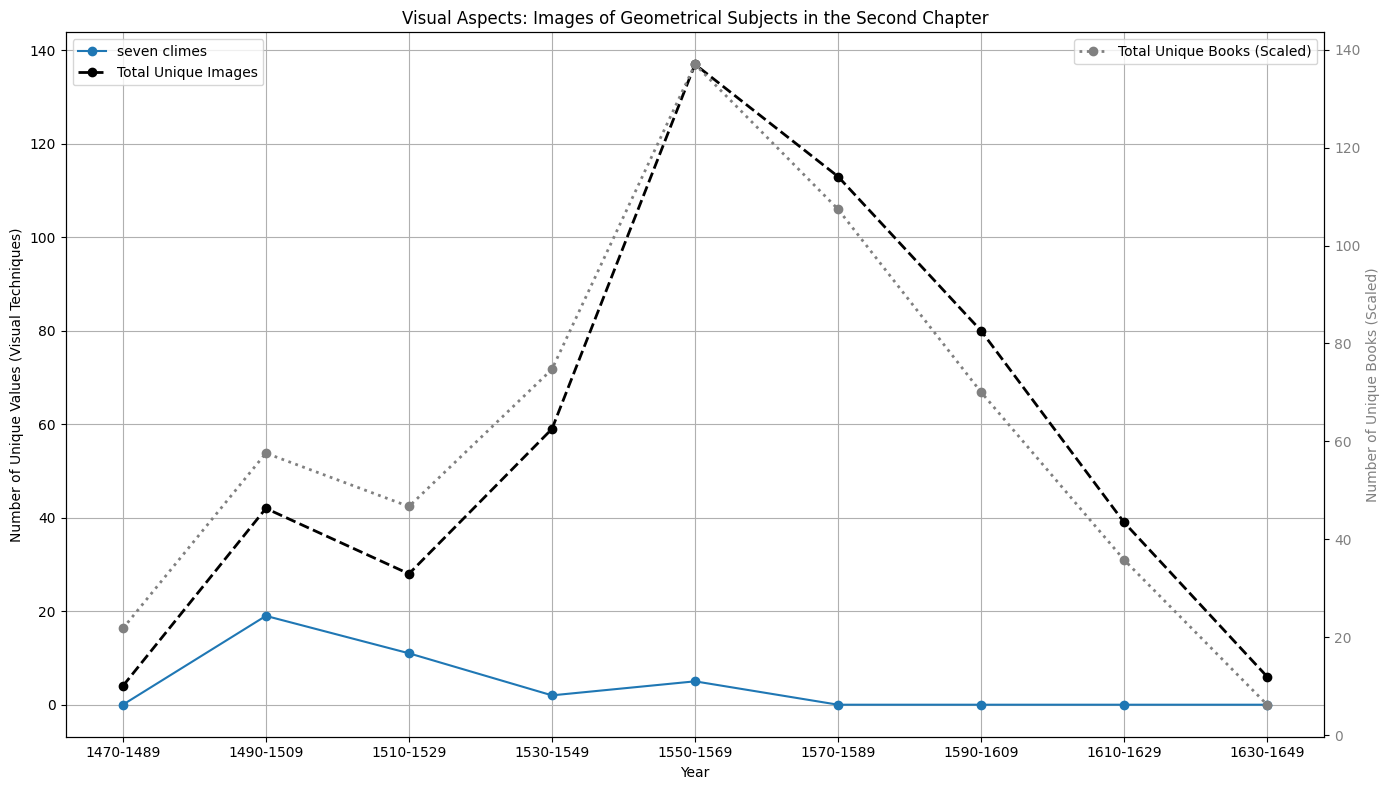

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'year' to int
five_zones_full['year'] = five_zones_full['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
five_zones_full['interval'] = pd.cut(five_zones_full['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name):
    filtered_df = five_zones_full[five_zones_full[column_name] == 'yes']
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
columns_to_plot = [
    'seven climes'
 ]

# Create a DataFrame to hold counts for each column
side_by_side_data = pd.DataFrame()

for column in columns_to_plot:
    side_by_side_data[column] = count_unique_images_by_column(column)

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = five_zones_full.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Determine a scaling factor for the secondary y-axis
scaling_factor = total_unique_images.max() / total_unique_books_df.max()

# Scale the book values for the secondary y-axis
scaled_books_df = total_unique_books_df * scaling_factor

# Plot lines with secondary y-axis for total unique books
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax1.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot lines for total unique images and total unique books
ax1.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax2.plot(labels, scaled_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books (Scaled)', linewidth=2)

# Formatting the plot
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Unique Values (Visual Techniques)')
ax2.set_ylabel('Number of Unique Books (Scaled)', color='gray')
ax1.set_title('Visual Aspects: Images of Geometrical Subjects in the Second Chapter')
ax1.tick_params(axis='y')
ax2.tick_params(axis='y', labelcolor='gray')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
